In [7]:
import torch

from torchvision import datasets, transforms

from torch import nn
from torch import optim

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import utils

<Figure size 432x288 with 0 Axes>

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

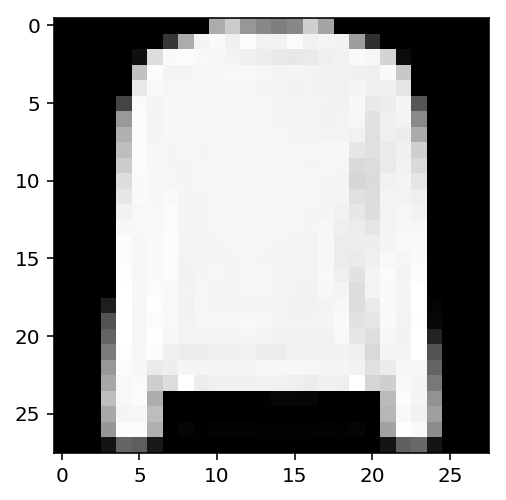

In [3]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [4]:
images.shape

torch.Size([64, 1, 28, 28])

### Define model architecture

In [54]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Running the model

In [55]:
epochs = 30

training_losses = []
validation_losses = []

for e in range(epochs):
    running_loss = 0
    test_loss = 0
    
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model(images)
#         log_output = torch.exp(output)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    
    else:
        training_losses.append(running_loss/len(trainloader))
        model.eval()
        with torch.no_grad():
            for test_images, test_labels in testloader:
                test_images = test_images.view(test_images.shape[0], -1)
                test_output = model(test_images)
                loss = criterion(test_output, test_labels)
                test_loss+=loss.item()
            else:
                validation_losses.append(test_loss/len(testloader))
                print("Epoch {}/{}: Training loss: {}  ....  Validation loss: {}".format(e+1, epochs, running_loss/len(trainloader),test_loss/len(testloader) ))

Epoch 1/30: Training loss: 0.5962036905734778  ....  Validation loss: 0.4536754039062816
Epoch 2/30: Training loss: 0.4345948293741578  ....  Validation loss: 0.40606214485730335
Epoch 3/30: Training loss: 0.3931701705336317  ....  Validation loss: 0.3805720923812526
Epoch 4/30: Training loss: 0.3731445457889581  ....  Validation loss: 0.3912025237349188
Epoch 5/30: Training loss: 0.35681215220931245  ....  Validation loss: 0.362355562532024
Epoch 6/30: Training loss: 0.3451579507829538  ....  Validation loss: 0.36719109953209095
Epoch 7/30: Training loss: 0.33106210209063885  ....  Validation loss: 0.3787237662988104
Epoch 8/30: Training loss: 0.32283447218983413  ....  Validation loss: 0.36377607622913494
Epoch 9/30: Training loss: 0.3133644111502145  ....  Validation loss: 0.3500431205626506
Epoch 10/30: Training loss: 0.3025043055828192  ....  Validation loss: 0.3490247094327477
Epoch 11/30: Training loss: 0.2974148737802816  ....  Validation loss: 0.3432072956281103
Epoch 12/30: T

### Plotting training and validation losses

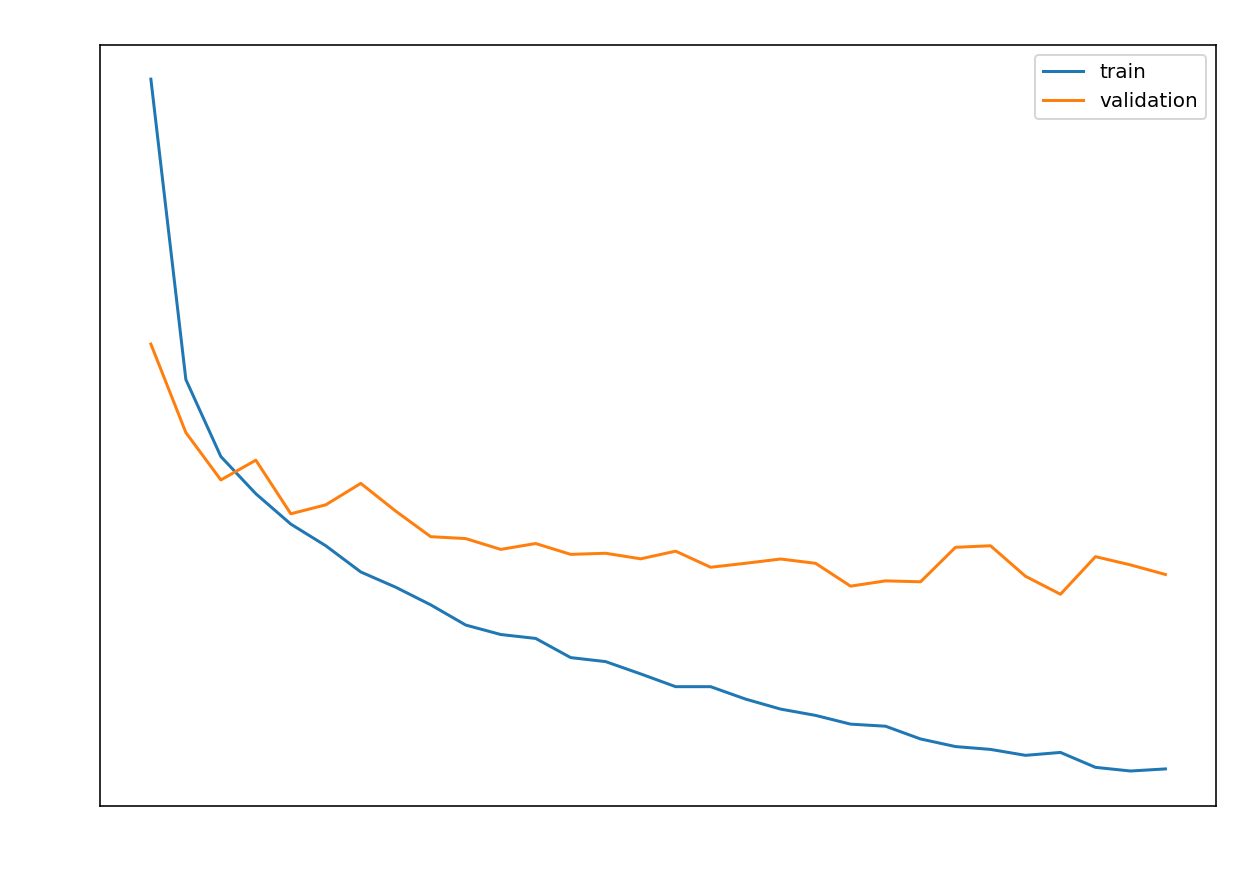

In [56]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    plt.figure(figsize=(10,7))
    a = plt.plot(range(epochs), training_losses)
    b = plt.plot(range(epochs), validation_losses)
    plt.title("Comparing losses as they evolve", color='white')
    plt.xlabel('Epoch', color='white')
    plt.ylabel('Running loss', color='white')
    plt.legend(['train', 'validation'])
    plt.show()

/Users/rachitjain/anaconda3/lib/python3.6/site-packages/torch/tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


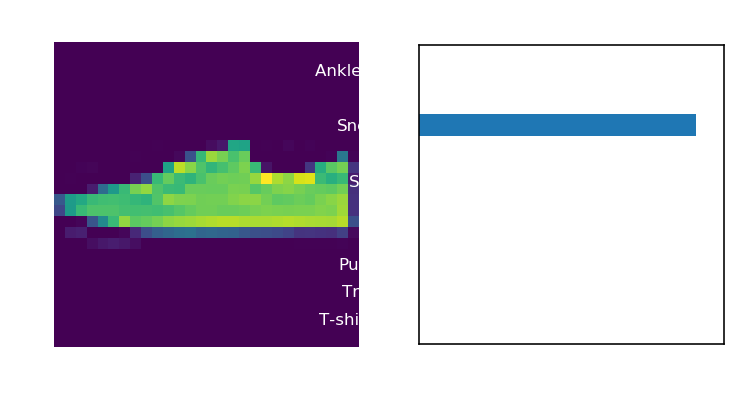

In [8]:
# ## Checking effectiveness of model
# images, labels = next(iter(trainloader))

# image = images[0].view(1, -1)

# with torch.no_grad():
#     logps = model(image)
    
# ps = torch.exp(logps)

# utils.view_classify(image.resize(1,28,28), ps, version='Fashion')